# 時系列データ解析(株価)

In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## データの取得

In [9]:
from pandas_datareader.yahoo.daily import YahooDailyReader
import datetime

In [10]:
date_st = datetime.datetime(2016, 1, 1)
date_fn = datetime.datetime(2020,1,1)

In [15]:
df1 = YahooDailyReader('MSFT', date_st, date_fn).read() #"MSFT"チェッカーコード

In [17]:
df1.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-12-31,37.580002,37.220001,37.400002,37.410000,17503500.0,32.600952
2014-01-02,37.400002,37.099998,37.349998,37.160000,30632200.0,32.383102
2014-01-03,37.220001,36.599998,37.200001,36.910000,31134800.0,32.165230
2014-01-06,36.889999,36.110001,36.849998,36.130001,43603700.0,31.485502
2014-01-07,36.490002,36.209999,36.330002,36.410000,35802800.0,31.729513


In [18]:
df1.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-25,137.589996,132.729996,137.250000,133.429993,33327400.0,132.175140
2019-06-26,135.740005,133.600006,134.350006,133.929993,23657700.0,132.670441
2019-06-27,134.710007,133.509995,134.139999,134.149994,16557500.0,132.888367
2019-06-28,134.600006,133.160004,134.570007,133.960007,30043000.0,132.700180
2019-07-01,136.699997,134.970001,136.630005,135.679993,22654200.0,134.403992


In [19]:
#3社分の株価を取得したい
symbols = ['AAPL', 'MSFT', 'GOOGL']

In [23]:
dfs = [YahooDailyReader(symbol, date_st, date_fn).read() for symbol in symbols]

In [25]:
dfs[0]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-12-31,80.182854,79.142860,79.167145,80.145714,55771100.0,71.950768
2014-01-02,79.575714,78.860001,79.382858,79.018570,58671200.0,70.938835
2014-01-03,79.099998,77.204285,78.980003,77.282860,98116900.0,69.380615
2014-01-06,78.114288,76.228569,76.778572,77.704285,103152700.0,69.758965
2014-01-07,77.994286,76.845711,77.760002,77.148575,79302300.0,69.260056
...,...,...,...,...,...,...
2019-06-25,199.259995,195.289993,198.429993,195.570007,21070300.0,193.786667
2019-06-26,200.990005,197.350006,197.770004,199.800003,26067500.0,197.978088
2019-06-27,201.570007,199.570007,200.289993,199.740005,20899700.0,197.918640


In [26]:
df2 = pd.concat(dfs, axis=0, keys=symbols) #axis = 0 行方向に結合

In [27]:
df2

High          Low         Open        Close  \
      Date                                                             
AAPL  2013-12-31    80.182854    79.142860    79.167145    80.145714   
      2014-01-02    79.575714    78.860001    79.382858    79.018570   
      2014-01-03    79.099998    77.204285    78.980003    77.282860   
      2014-01-06    78.114288    76.228569    76.778572    77.704285   
      2014-01-07    77.994286    76.845711    77.760002    77.148575   
...                       ...          ...          ...          ...   
GOOGL 2019-06-25  1115.699951  1084.599976  1115.079956  1087.579956   
      2019-06-26  1095.119995  1073.689941  1091.000000  1080.319946   
      2019-06-27  1088.459961  1075.849976  1086.750000  1076.630005   
      2019-06-28  1082.800049  1073.800049  1077.229980  1082.800049   
      2019-07-01  1108.589966  1095.329956  1101.040039  1100.000000   

                       Volume    Adj Close  
      Date                                  
AAPL  2013-12-31   55771100.0    71.950768  
      2014-01-02   58671200.0    70.938835  
      2014-01-03   98116900.0    69.380615  
      2014-01-06  103152700.0    69.758965  
      2014-01-07   79302300.0    69.260056  
...                       ...          ...  
GOOGL 2019-06-25    1582200.0  1087.579956  
      2019-06-26    1734900.0  1080.319946  
      2019-06-27    1203900.0  1076.630005  
      2019-06-28    1683600.0  1082.800049  
      2019-07-01    1459800.0  1100.000000  

[4152 rows x 6 columns]

In [34]:
df2 = pd.concat(dfs, axis=0, keys=symbols).unstack(0) #列方向のデータ(今回は0列目)を行方向に動かす。

In [35]:
df2

High                                  Low              \
                  AAPL        MSFT        GOOGL        AAPL        MSFT   
Date                                                                      
2013-12-31   80.182854   37.580002   561.061035   79.142860   37.220001   
2014-01-02   79.575714   37.400002   559.434448   78.860001   37.099998   
2014-01-03   79.099998   37.220001   559.024048   77.204285   36.599998   
2014-01-06   78.114288   36.889999   559.989990   76.228569   36.110001   
2014-01-07   77.994286   36.490002   570.415405   76.845711   36.209999   
...                ...         ...          ...         ...         ...   
2019-06-25  199.259995  137.589996  1115.699951  195.289993  132.729996   
2019-06-26  200.990005  135.740005  1095.119995  197.350006  133.600006   
2019-06-27  201.570007  134.710007  1088.459961  199.570007  133.509995   
2019-06-28  199.500000  134.600006  1082.800049  197.050003  133.160004   
2019-07-01  204.490005  136.699997  1108.589966  200.649994  134.970001   

                               Open                                Close  \
                  GOOGL        AAPL        MSFT        GOOGL        AAPL   
Date                                                                       
2013-12-31   553.683655   79.167145   37.400002   556.676697   80.145714   
2014-01-02   554.684692   79.382858   37.349998   558.288269   79.018570   
2014-01-03   553.018005   78.980003   37.200001   558.058044   77.282860   
2014-01-06   553.773804   76.778572   36.849998   557.062073   77.704285   
2014-01-07   561.141113   77.760002   36.330002   563.063049   77.148575   
...                 ...         ...         ...          ...         ...   
2019-06-25  1084.599976  198.429993  137.250000  1115.079956  195.570007   
2019-06-26  1073.689941  197.770004  134.350006  1091.000000  199.800003   
2019-06-27  1075.849976  200.289993  134.139999  1086.750000  199.740005   
2019-06-28  1073.800049  198.679993  134.570007  1077.229980  197.919998   
2019-07-01  1095.329956  203.169998  136.630005  1101.040039  201.550003   

                                          Volume                         \
                  MSFT        GOOGL         AAPL        MSFT      GOOGL   
Date                                                                      
2013-12-31   37.410000   560.915894   55771100.0  17503500.0  2713000.0   
2014-01-02   37.160000   557.117126   58671200.0  30632200.0  3639100.0   
2014-01-03   36.910000   553.053040   98116900.0  31134800.0  3330000.0   
2014-01-06   36.130001   559.219238  103152700.0  43603700.0  3535000.0   
2014-01-07   36.410000   570.000000   79302300.0  35802800.0  5100000.0   
...                ...          ...          ...         ...        ...   
2019-06-25  133.429993  1087.579956   21070300.0  33327400.0  1582200.0   
2019-06-26  133.929993  1080.319946   26067500.0  23657700.0  1734900.0   
2019-06-27  134.149994  1076.630005   20899700.0  16557500.0  1203900.0   
2019-06-28  133.960007  1082.800049   31110600.0  30043000.0  1683600.0   
2019-07-01  135.679993  1100.000000   27316700.0  22654200.0  1459800.0   

             Adj Close                           
                  AAPL        MSFT        GOOGL  
Date                                             
2013-12-31   71.950768   32.600952   560.915894  
2014-01-02   70.938835   32.383102   557.117126  
2014-01-03   69.380615   32.165230   553.053040  
2014-01-06   69.758965   31.485502   559.219238  
2014-01-07   69.260056   31.729513   570.000000  
...                ...         ...          ...  
2019-06-25  193.786667  132.175140  1087.579956  
2019-06-26  197.978088  132.670441  1080.319946  
2019-06-27  197.918640  132.888367  1076.630005  
2019-06-28  196.115219  132.700180  1082.800049  
2019-07-01  199.712143  134.403992  1100.000000  

[1384 rows x 18 columns]

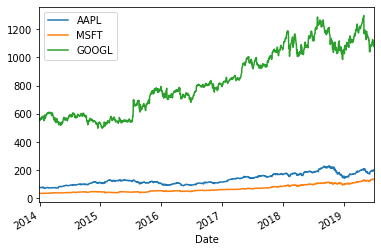

In [36]:
df2['Close'].plot()

## トレンド抽出

In [37]:
from fbprophet import Prophet #NNではなく伝統的な統計学

In [40]:
# モデルのインスタンス化
model = Prophet()

In [41]:
# マイクロソフトの下部のトレンド予測を行う
df1.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-12-31,37.580002,37.220001,37.400002,37.41,17503500.0,32.600952
2014-01-02,37.400002,37.099998,37.349998,37.16,30632200.0,32.383102
2014-01-03,37.220001,36.599998,37.200001,36.91,31134800.0,32.165230


In [43]:
# reset_index()メンバを取り直してくれる.複数行のタグを直したい.
df1.reset_index().head(3)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2013-12-31,37.580002,37.220001,37.400002,37.41,17503500.0,32.600952
1,2014-01-02,37.400002,37.099998,37.349998,37.16,30632200.0,32.383102
2,2014-01-03,37.220001,36.599998,37.200001,36.91,31134800.0,32.165230


In [44]:
#Prophet:日付をds, 予測したい項目をyとする必要がある
#Date → ds, Close → y
data = df1.reset_index().rename(columns = {'Date':'ds', 'Close':'y'})

In [45]:
data.head()

,ds,High,Low,Open,y,Volume,Adj Close
0,2013-12-31,37.580002,37.220001,37.400002,37.410000,17503500.0,32.600952
1,2014-01-02,37.400002,37.099998,37.349998,37.160000,30632200.0,32.383102
2,2014-01-03,37.220001,36.599998,37.200001,36.910000,31134800.0,32.165230
3,2014-01-06,36.889999,36.110001,36.849998,36.130001,43603700.0,31.485502
4,2014-01-07,36.490002,36.209999,36.330002,36.410000,35802800.0,31.729513


In [46]:
model.fit(data) #modelはPropfetのインスタンス

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [47]:
# 未来の日付を予測したい日数分指定する
future = model.make_future_dataframe(periods = 365)

In [49]:
# トレンドの予測を行う
forecast= model.predict(future)

[]

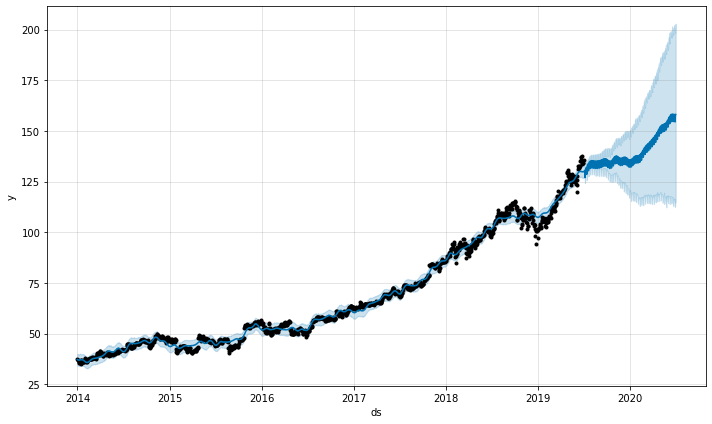

In [51]:
#予測を可視化
model.plot(forecast)
plt.plot()

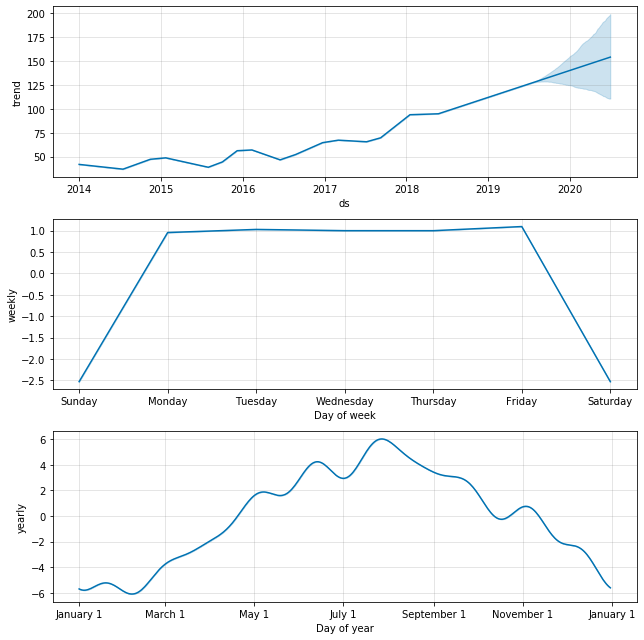

In [54]:
# トレンドと周期性の抽出
model.plot_components(forecast)
plt.show()